# Bio 302 Homework 2

There are two parts to this homework, some python work and some problems from the textbook.

**Part 1: Python**

Complete the four intertwined python problems in this notebook. Please solve them in the indicated space, and ensure that your solutions pass all supplied tests.

**Part 2: Textbook**

Read/skim Chapter 1. Read Chapter 2.

Chapter 2 Problems/Computer Lab: 2-2, 2-6, 2-8

*FYI 1: Some parts of the text problems ask you to take an action, but do not ask you a specific question. In such cases, the implicit question is to write one or two sentences that demonstrate that you took the action and understood its intent. You might describe what you observe, perhaps taking a screenshot, note something that you've learned or questions that have been raised.*

*FYI 2: It's not a bad idea to look through all of the text's "Discussion Questions", "Problems/Computer Lab" and the "Self-Test Quiz", whether assigned as homework or not. They or modified/recombined versions of them are likely to appear on the midterm.*

**Submission**

Submit your solutions as a link to a Gist via a Slack DM. You are welcome to compose your solutions to the textbook problems in a word-processing program, although you may also simply use this python notebook. If you do end up with multiple files, please ensure that you add all of them in a single Gist, rather than creating multiple Gists. (To add files to a Gist, look for the "Add File" button in the lower left.)

### Problem 1

Use the `open()` command below to load in 'height_weight.txt', which
contains 200 records of human heights and weights, one
record to a line, separated by commas. Consulting [this tutorial](http://matplotlib.org/users/pyplot_tutorial.html), write some code
that uses matplotlib to make a PNG image plotting
these data in a scatter plot in this notebook. Plot height on the x-axis
and weight on the y-axis. Label the axes
appropriately. Style the plot as you like. :)

In [3]:
# -- Some standard imports for the plotting package matplotlib,
#    and some setup. You'll want to leave these as is.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [4]:
# -- Parse data from file into two python lists. You'll need to understand how
#    this code works in order to solve the next problem.

# -- initialize some variables to hold on to our data
# -- lists are a natural choice, because we want to preserve the paired
#    relationship between height and weight
# -- other sensible options are available though...
heights, weights = [], []

# -- this means: open up the indicated file, and process it line-by-line
for line in open('height_weight.txt'):
    if line.startswith('Height'):
        # skip header line
        continue
    
    # break up the line into its 'words', which are delimited by commas
    ht, wt = line.strip().split(',')
    
    # two critical things happen in each of these respective lines:
    #   1. the string representing the height(weight) is cast to a float (ie, a floating-point number)
    #   2. the number is appended to the appropriate list
    heights.append(float(ht))
    weights.append(float(wt))

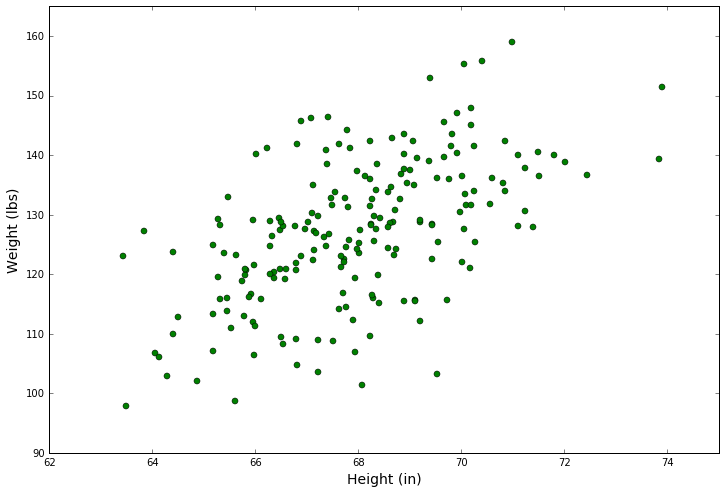

In [46]:
# -- Put your solution in this cell. The resulting output should be a legible plot.
plt.plot(heights,weights,'go')
plt.axis([62,75,90,165])
plt.xlabel('Height (in)', fontsize=14)
plt.ylabel('Weight (lbs)', fontsize=14)

plt.show()

### Problem 2

The data file 'genetic_code.txt'
contains the mapping from DNA codon triplet to amino
acid code, one mapping per line. (The amino acid
'encoded' by a stop codon is an '*'.) Using this file,
produce a dictionary named 'genetic_code', which maps
codon onto amino acid.

Your solution must pass the included tests.

In [1]:
genetic_code = {}
for i in open('genetic_code.txt'):
    codon, amino_acid = i.strip().split()
    genetic_code[codon] = amino_acid

In [3]:
# -- Test your solution here. If the `assert` condition is True, then nothing will happen,
#    which is what you want. If the condition is False, an error that you need to resolve
#    will be shown.
assert len(genetic_code) == 64
assert genetic_code['CCC'] == 'P'
assert genetic_code['TGA'] == '*'

### Problem 3

Write a function `chunk`, taking one string argument
'in_string' and one integer argument 'size', that
chunks 'in_string' into consecutive strings of length
'size', and returns the strings in a list. If there
are leftover characters, because 'in_string's length
is not a multiple of 'size', ignore them.

Your function must pass the included tests.

In [16]:
def chunk(in_string, size):
    ret_list = []
    while len(in_string) >= size:
        ret_list.append(in_string[:size])
        in_string = in_string[size:]
    return ret_list

In [17]:
# -- Test your solution here.
test_string = 'chapman panthers' 
assert chunk(test_string, 3) == ['cha', 'pma', 'n p', 'ant', 'her']
assert chunk(test_string, 4) == ['chap', 'man ', 'pant', 'hers']
assert chunk(test_string, 1) == ['c', 'h', 'a', 'p', 'm', 'a', 'n', ' ', 'p', 'a', 'n', 't', 'h', 'e', 'r', 's']
assert chunk('', 3) == []

### Problem 4

Re-use your answers from problems 2 and 3 to write a
function 'translate' that translates a DNA sequence
into its corresponding protein sequence. You may assume that any supplied DNA
sequences will only include the characters A, C, G, and T, but you may not assume that
these characters will be uppercase. The protein sequence that you produce should use only upper case characters.
If you
encounter a stop codon, you should show the stop
codon, but then cease further translation. If your DNA
sequence length is not a multiple of 3, ignore the
extra nucleotides on the trailing (rightmost) end. 


In [30]:
def translate(sequence):
    sequence = sequence.upper()
    protein = ''
    for i in chunk(sequence,3):
        protein += genetic_code[i]
        if genetic_code[i] is '*':
            return protein
    return protein

In [31]:
# -- Test your solution here.
assert translate('GATTACA') == 'DY'
assert translate('gatTACa') == 'DY'
assert translate('GGCTGAAGACCTAACCGTTC') == 'G*'
assert translate('') == ''

## Textbook Problem 2-2

(1) NC_006478.3 - found @ http://www.ncbi.nlm.nih.gov/gene/450978

(2) http://www.ncbi.nlm.nih.gov/homologene/68066 
    This step involved going to HomoloGene and searching for beta globin, which returned a list of 4 results that included beta globin.

## Textbook Problem 2-6

(1) The Ensembl resource for humans is easily accessible by Google search. The page is broken up into 5 categories in which there are links to actions you can take with their data.

(2) The region we selected is about 3/5 of the way up the chromosome, in p15.4.

(3) The region we selected is 6000 base pairs wide.  Depending on how we define "flank", there are about 11 olfactory receptor genes flanking the region we selected. There is exactly 1 olfactory receptor gene in our region.

(4) The next panel is zoomed in entirely on the region we selected. I can see how this can be useful when we need to know exactly what is going on in a certain region (e.g. what genes are in that region).

## Textbook Problem 2-8

(1) The UCSC hgGateway is pretty simple to use. I like that it shows suggestions when you type in a certain recognized gene.

(2) This seems to be the same position we were in the earlier exercise on GenBank.

(3) Selecting full for the RepeatMasker separates the two blocks so that there is one block left and above the other.

(4) The answer is (d) There is one LINE element and one low-complexity element.